In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.metrics import confusion_matrix



In [4]:
# Read the CSV files
table_f = pd.read_csv("spotify_merged.csv")
genre = pd.read_csv("genre_music.csv")

# Convert to Pandas DataFrame
music_df = pd.DataFrame(table_f)

# Display the first five rows of the DataFrame
print(music_df.head(5))

                   track            artist  \
0  Jealous Kind Of Fella     Garland Green   
1          Initials B.B.  Serge Gainsbourg   
2           Melody Twist       Lord Melody   
3          Mi Bomba Sonó        Celia Cruz   
4            Uravu Solla       P. Susheela   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0403         0.490          0.000000    0.0779    0.845   
1     1       0.0337         0.018          0.107000    0.1760    0.797   
2     1       0.0

In [5]:
# Display the first five rows of the DataFrame
print(music_df.head(5))

# Add row_id
music_df['id'] = range(1, len(music_df) + 1)

# Drop the 'uri' column
music_df = music_df.drop(columns=['uri'])

# Make a new column for duration in seconds
music_df['duration_s'] = music_df['duration_ms'] / 1000

# Drop the 'duration_ms' column
music_df = music_df.drop(columns=['duration_ms'])

# Display the updated DataFrame
print(music_df.head(5))


                   track            artist  \
0  Jealous Kind Of Fella     Garland Green   
1          Initials B.B.  Serge Gainsbourg   
2           Melody Twist       Lord Melody   
3          Mi Bomba Sonó        Celia Cruz   
4            Uravu Solla       P. Susheela   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0403         0.490          0.000000    0.0779    0.845   
1     1       0.0337         0.018          0.107000    0.1760    0.797   
2     1       0.0

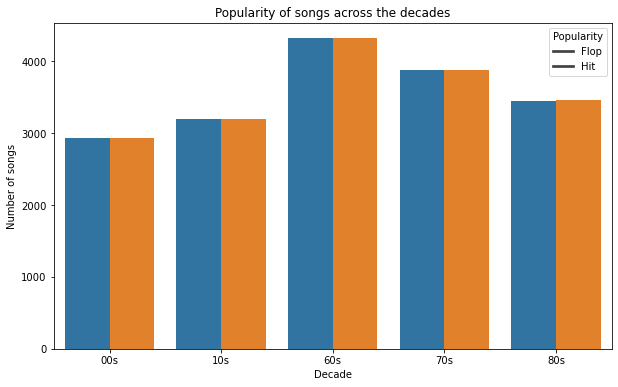

In [6]:
# Defining the order of the x-axis by decade
decades_list = ["60s", "70s", "80s", "90s", "00s", "10s"]

# Grouping by decade and popularity, then calculate the count
popularity_counts = music_df.groupby(['decade', 'popularity']).size().reset_index(name='n')

# Plotting the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='decade', y='n', hue='popularity', data=popularity_counts, palette=['#1f77b4', '#ff7f0e'])
plt.title("Popularity of songs across the decades")
plt.xlabel("Decade")
plt.ylabel("Number of songs")
plt.legend(title="Popularity", labels=["Flop", "Hit"])
plt.show()

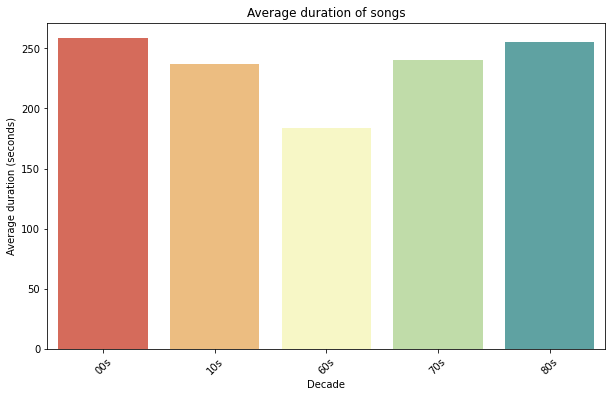

In [7]:
# Group by decade and calculate the average duration
avg_duration_df = music_df.groupby('decade')['duration_s'].mean().reset_index(name='avg_duration')

# Plotting the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='decade', y='avg_duration', data=avg_duration_df, palette='Spectral')
plt.title("Average duration of songs")
plt.xlabel("Decade")
plt.ylabel("Average duration (seconds)")
plt.xticks(rotation=45)
plt.show()


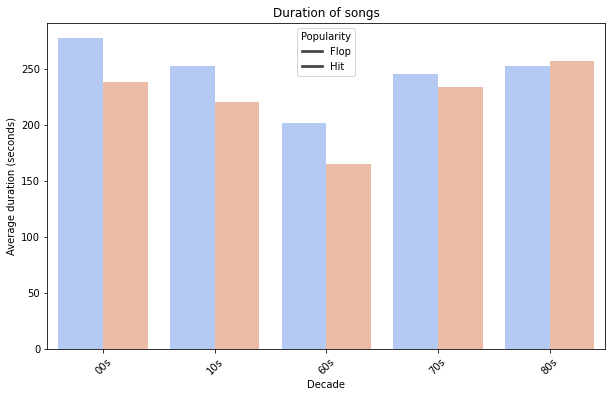

In [8]:
# Group by popularity and decade, then calculate the average duration
avg_duration_popularity_df = music_df.groupby(['popularity', 'decade'])['duration_s'].mean().reset_index(name='avg_duration')

# Plotting the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='decade', y='avg_duration', hue='popularity', data=avg_duration_popularity_df, palette='coolwarm', dodge=True)
plt.title("Duration of songs")
plt.xlabel("Decade")
plt.ylabel("Average duration (seconds)")
plt.legend(title="Popularity", labels=["Flop", "Hit"])
plt.xticks(rotation=45)
plt.show()


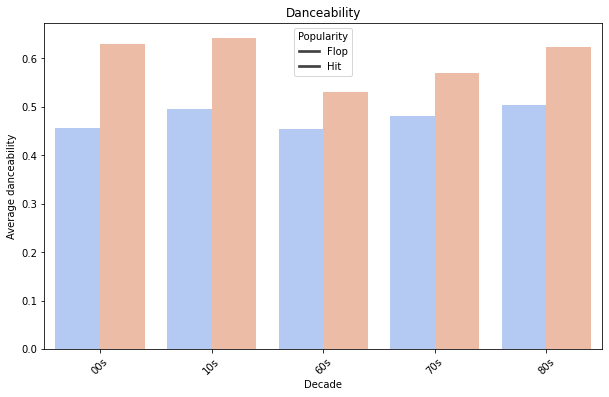

In [9]:
# Group by popularity and decade, then calculate the average danceability
avg_danceability_popularity_df = music_df.groupby(['popularity', 'decade'])['danceability'].mean().reset_index(name='avg_danceability')

# Plotting the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='decade', y='avg_danceability', hue='popularity', data=avg_danceability_popularity_df, palette='coolwarm', dodge=True)
plt.title("Danceability")
plt.xlabel("Decade")
plt.ylabel("Average danceability")
plt.legend(title="Popularity", labels=["Flop", "Hit"])
plt.xticks(rotation=45)
plt.show()


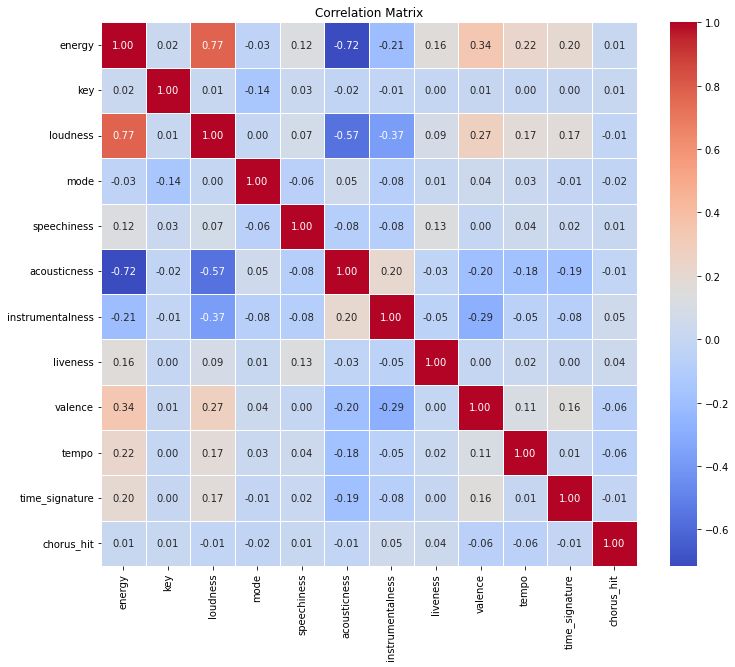

In [10]:
# Select columns 4 to 14
cor_table = music_df.iloc[:, 3:15]

# Calculate the correlation matrix
coemat = cor_table.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(coemat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


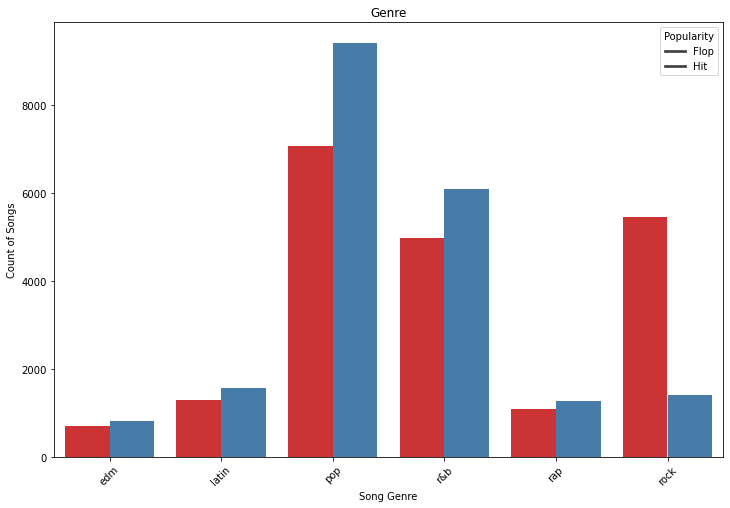

In [11]:
# Convert to Pandas DataFrame
music_df = pd.DataFrame(genre)

# Group by decade, genre, and popularity, then calculate counts
genre_count_df = music_df.groupby(['decade', 'genre', 'popularity']).size().reset_index(name='counts')

# Group by genre and popularity to calculate total counts
genre_hit_count_total = genre_count_df.groupby(['genre', 'popularity'])['counts'].sum().reset_index(name='counts')

# Plotting the data using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='counts', hue='popularity', data=genre_hit_count_total, palette='Set1', dodge=True)
plt.title("Genre")
plt.xlabel("Song Genre")
plt.ylabel("Count of Songs")
plt.legend(title="Popularity", labels=["Flop", "Hit"])
plt.xticks(rotation=45)
plt.show()


<Figure size 864x576 with 0 Axes>

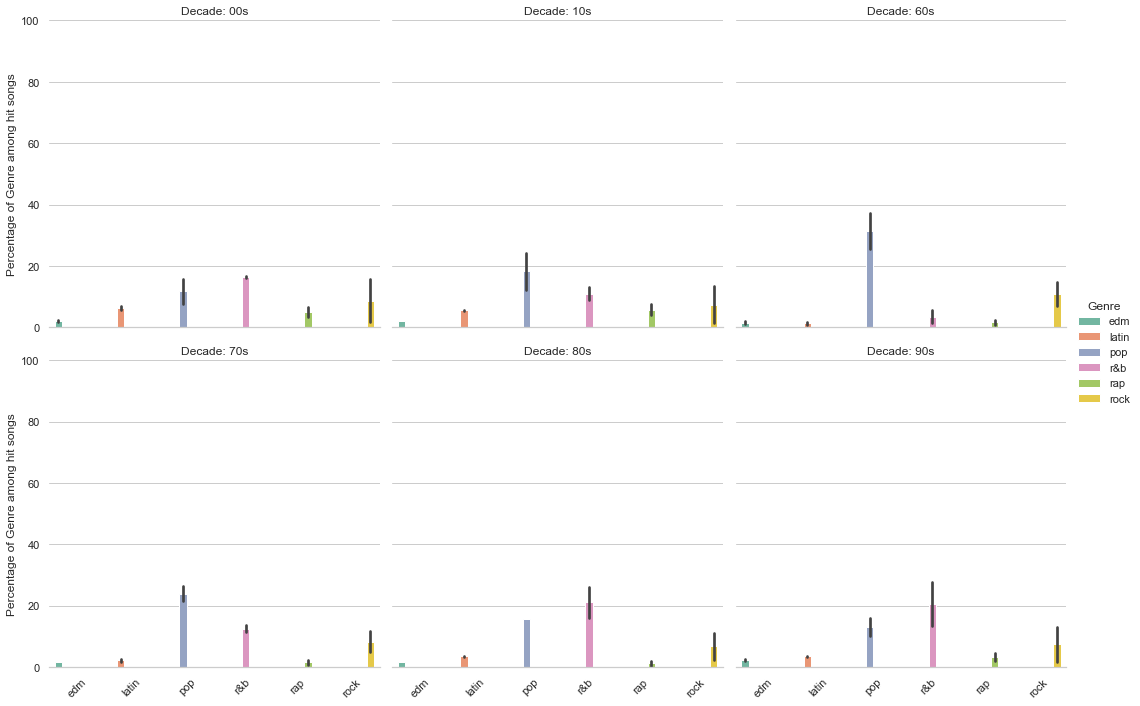

In [12]:
# Group by genre, popularity=1, and decade to calculate counts
genre_hit_decades = genre_count_df.groupby(['genre', 'popularity', 'decade'])['counts'].sum().reset_index(name='counts')

# Group by decade to calculate the percentage
genre_hit_decades = genre_hit_decades.groupby('decade').apply(lambda x: x.assign(percent=(x['counts'] / x['counts'].sum() * 100).round(2)))

# Plotting the data using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(genre_hit_decades, col="decade", col_wrap=3, height=5)
g.map_dataframe(sns.barplot, x="genre", y="percent", hue="genre", palette="Set2", dodge=True)
g.set_axis_labels("", "Percentage")
g.set_titles("Decade: {col_name}")
g.set(ylim=(0, 100))
g.despine(left=True)
g.set_ylabels("Percentage of Genre among hit songs")
g.add_legend(title="Genre")
g.set_xticklabels(rotation=45)
plt.show()


<Figure size 864x576 with 0 Axes>

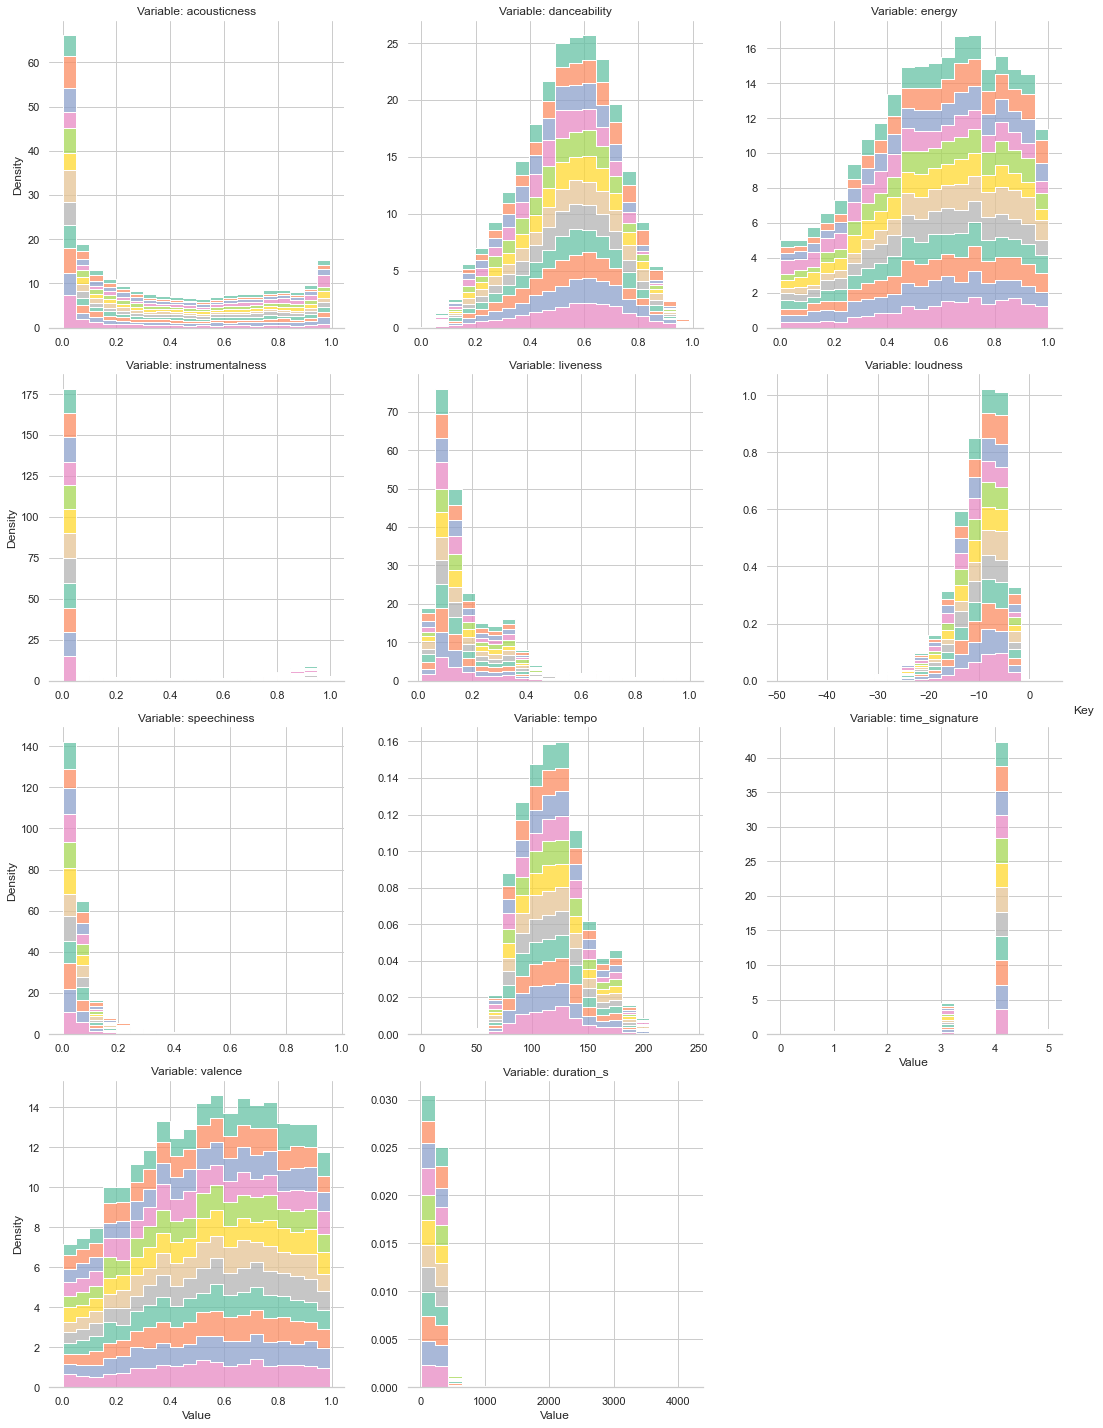

In [13]:
# Select columns
selected_columns = ['acousticness', 'danceability', 'energy', 'key', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence', 'duration_s', 'popularity']

# Subset the DataFrame with the selected columns
subset_df = genre[selected_columns]

# Reshape the DataFrame using melt
melted_df = subset_df.melt(id_vars=['popularity', 'key'], var_name='variable', value_name='value')

# Plotting the data using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(melted_df, col="variable", col_wrap=3, height=5, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="value", bins=20, kde=False, element="step", stat="density", common_norm=False, hue="key", multiple="stack", palette="Set2")
g.set_axis_labels("Value", "Density")
g.set_titles("Variable: {col_name}")
g.despine(left=True)
g.add_legend(title="Key")
plt.show()


In [14]:
# Set seed for reproducibility
seed = 1

# Create a stratified sample based on the 'genre' column
genre_list = ["rap", "pop", "r&b", "edm", "latin", "rock"]
dataspot, _ = train_test_split(genre, test_size=500, random_state=seed, stratify=genre['genre'].isin(genre_list))

# Calculate sums of selected columns
sum_acousticness = dataspot['acousticness'].sum()
sum_danceability = dataspot['danceability'].sum()
# ... Repeat for other columns ...

# Normalize selected columns
columns_to_normalize = ['acousticness', 'danceability', 'duration_s', 'energy', 'instrumentalness',
                         'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
                         'time_signature', 'valence']

dataspot[columns_to_normalize] = dataspot[columns_to_normalize].div(dataspot[columns_to_normalize].sum())

# Write the dataframe to a CSV file
dataspot.to_csv('knn_songs.csv', index=False)


In [15]:
# Load the dataset
dataspot = pd.read_csv("knn_songs.csv")

# Select relevant columns
song_factors = dataspot.iloc[:, 2:18]

# Display the head of the dataframe
print(song_factors.head())

# Calculate correlation matrix
new_songs_cor = song_factors.corr().round(1)

# Select relevant columns for classification
songs_norm = song_factors[['popularity', 'danceability', 'speechiness', 'valence']]

# Split the data into training and testing sets
data_samples = song_factors.shape[0]
training_data, test_data = train_test_split(songs_norm, test_size=0.3, random_state=seed)

# Separate features and target variable
X_train = training_data.drop("popularity", axis=1)
y_train = training_data["popularity"]
X_test = test_data.drop("popularity", axis=1)
y_test = test_data["popularity"]

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN on training data
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

# Evaluate on training data
y_train_pred = classifier.predict(X_train)
print("Training Data:")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# KNN on testing data
y_test_pred = classifier.predict(X_test)
print("Testing Data:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


   danceability    energy       key  loudness      mode  speechiness  \
0      0.000032  0.000027  0.000033  0.000023  0.000036     0.000026   
1      0.000039  0.000025  0.000000  0.000020  0.000036     0.000015   
2      0.000017  0.000007  0.000019  0.000047  0.000000     0.000013   
3      0.000027  0.000031  0.000043  0.000024  0.000036     0.000023   
4      0.000021  0.000015  0.000005  0.000026  0.000036     0.000017   

   acousticness  instrumentalness  liveness   valence     tempo  duration_s  \
0      0.000004      0.000000e+00  0.000010  0.000034  0.000021    0.000017   
1      0.000006      3.124470e-10  0.000008  0.000035  0.000021    0.000021   
2      0.000064      4.622940e-07  0.000013  0.000008  0.000019    0.000026   
3      0.000039      0.000000e+00  0.000018  0.000043  0.000035    0.000012   
4      0.000008      5.946057e-09  0.000014  0.000008  0.000028    0.000033   

   time_signature  chorus_hit  sections  popularity  
0        0.000025    24.76919         

In [16]:
# Assuming songs_norm and classifier_total are defined previously

# Convert popularity to categorical variable using .copy()
songs_norm['popularity'] = pd.Categorical(songs_norm['popularity']).copy()

# KNN on total dataset using cross-validation
classifier_total = KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(classifier_total, songs_norm.drop('popularity', axis=1), songs_norm['popularity'], cv=10)

# Display cross-validation scores
print("Cross-validation Scores:")
print(scores)
print("Mean Accuracy:", np.mean(scores))

# Confusion matrix for total dataset
y_total_pred = cross_val_predict(classifier_total, songs_norm.drop('popularity', axis=1), songs_norm['popularity'], cv=10)
conf_matrix_total = confusion_matrix(songs_norm['popularity'], y_total_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix_total)


/var/folders/7q/mlx8nshd49992nf1p80t715w0000gn/T/ipykernel_48084/1783600524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_norm['popularity'] = pd.Categorical(songs_norm['popularity']).copy()


Cross-validation Scores:
[0.59014778 0.58448276 0.59162562 0.59778325 0.58719212 0.58793103
 0.58029557 0.59433498 0.58423645 0.58610495]
Mean Accuracy: 0.5884134508608857
Confusion Matrix:
[[15965  4336]
 [12374  7924]]


In [17]:
# Select features (X) and target variable (y)
X = songs_norm.drop('popularity', axis=1)
y = songs_norm['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = knn.predict(X_train)

# Predictions on the testing set
y_test_pred = knn.predict(X_test)

# Evaluate accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate accuracy on testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Confusion matrix on testing set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate RMSE for training set
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate RMSE for testing set
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Print results
print(f"For our training set, we achieved an accuracy of {train_accuracy * 100:.2f}% "
      f"and correctly classified {int(train_accuracy * len(X_train))} songs out of {len(X_train)}. "
      f"The RMSE value for our training set was {train_rmse:.4f}.")

print(f"For our testing set, we achieved an accuracy of {test_accuracy * 100:.2f}% "
      f"and correctly classified {int(test_accuracy * len(X_test))} songs out of {len(X_test)}. "
      f"The RMSE value for our testing set was {test_rmse:.4f}.")


Training Accuracy: 0.7541
Testing Accuracy: 0.6372
Confusion Matrix:
[[2435 1602]
 [1344 2739]]
For our training set, we achieved an accuracy of 75.41% and correctly classified 24492 songs out of 32479. The RMSE value for our training set was 0.4959.
For our testing set, we achieved an accuracy of 63.72% and correctly classified 5174 songs out of 8120. The RMSE value for our testing set was 0.6023.


In [20]:
r2 = r2_score(y_test, y_test_pred)
print(f"R^2 Score for Testing Set: {r2:.4f}")

R^2 Score for Testing Set: -0.4513


In [22]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     16264
           1       0.74      0.78      0.76     16215

    accuracy                           0.75     32479
   macro avg       0.75      0.75      0.75     32479
weighted avg       0.75      0.75      0.75     32479



In [23]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      4037
           1       0.63      0.67      0.65      4083

    accuracy                           0.64      8120
   macro avg       0.64      0.64      0.64      8120
weighted avg       0.64      0.64      0.64      8120

